In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [3]:

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

In [4]:
# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", accuracy)


NameError: name 'X_train' is not defined

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Test Accuracy:", accuracy)


Random Forest Test Accuracy: 0.9


In [8]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Test Accuracy: 0.895


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:21:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


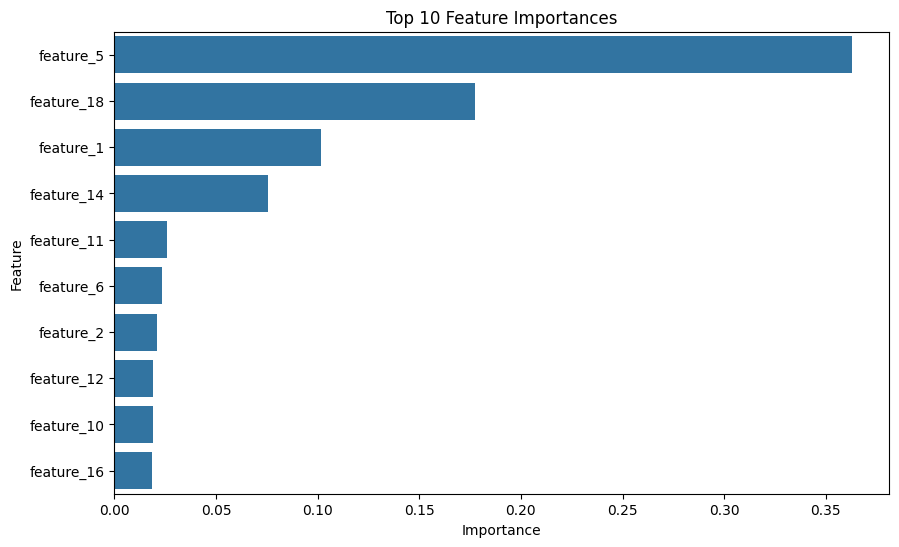

In [10]:
importances = rf_model.feature_importances_

feature_names = [f'feature_{i}' for i in range(X.shape[1])]


feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Top 10 Feature Importances')
plt.show()

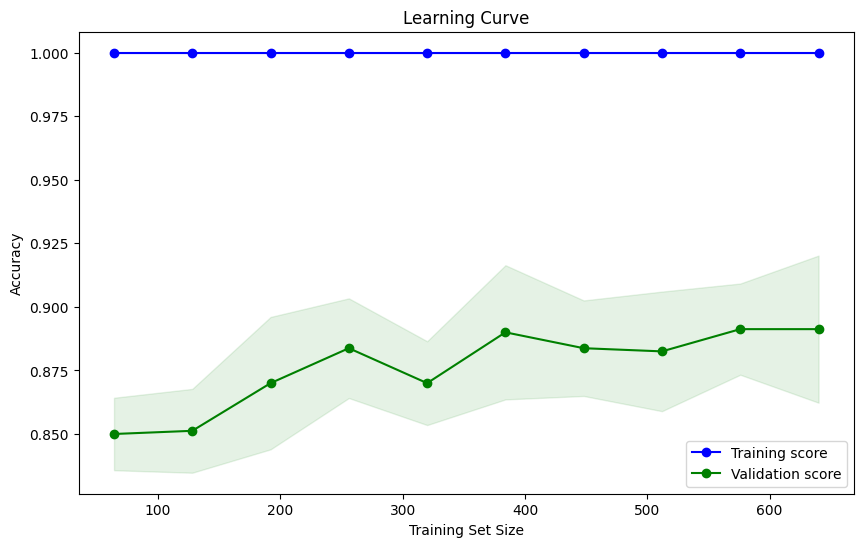

In [11]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Mean and std
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation score')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, alpha=0.1, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()


In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_

y_pred_best = best_model.predict(X_test)
print("Tuned RF Test Accuracy:", accuracy_score(y_test, y_pred_best))


Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Tuned RF Test Accuracy: 0.89


In [13]:
import joblib
joblib.dump(best_model, "final_model.pkl")


['final_model.pkl']